# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB
None


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [11]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [12]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.1036935483109797
MSE is: 0.02022001958450324
RMSE is: 0.14219711524677017


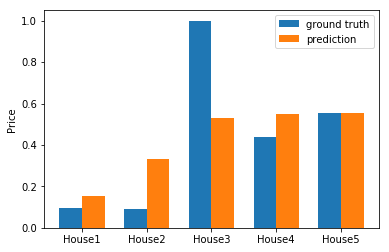

In [13]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error

insurance_df = pd.read_csv('insurance.csv')

print('feature   missing values')
print(insurance_df.isnull().sum())
print('No missing values')

labelencoder = LabelEncoder()
insurance_df['sex'] = labelencoder.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = labelencoder.fit_transform(insurance_df['smoker'])
insurance_df['region'] = labelencoder.fit_transform(insurance_df['region'])

feature   missing values
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values


### 2.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [ ]:
insurance_fea = insurance_df.drop('charges', axis=1).values
insurance_charges = insurance_df['charges'].values
insurance_charges = insurance_charges / np.max(insurance_charges)

X_train,X_test,y_train,y_test = train_test_split(insurance_fea,
                                                 insurance_charges,
                                                 test_size=0.2,
                                                 random_state=42)

print(X_train.shape)
print(X_test.shape)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 6)
(268, 6)


### 2.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [3]:

lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients are"+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('Prediction for Training Set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.20928336460705027
coefficients are[ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
Prediction for Training Set
MAE is: 0.06599864797091508
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


### 2.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

Prediction for Testing Set
MAE is: 0.06564969107169766
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


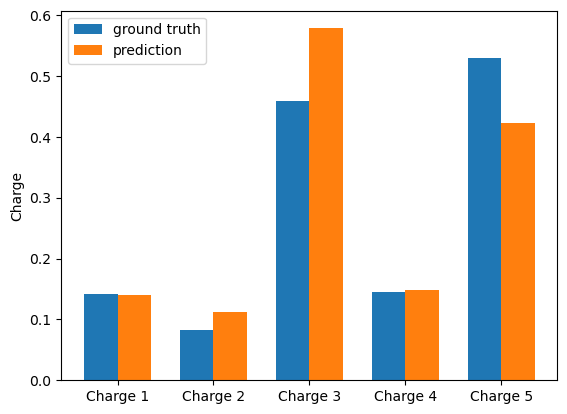

In [4]:
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Charge 1', 'Charge 2', 'Charge 3', 'Charge 4', 'Charge 5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Charge')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### 2.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 2.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 2.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [11]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)

print('Ridge Regression with lambda value of 1')
print("bias is " + str(rr.intercept_))
print("coefficients are " + str(rr.coef_))

y_test_pred = rr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print('\n-----------------------------------\n')


rr_small = Ridge(alpha=0.5)
rr_small.fit(X_train, y_train)

print('Ridge Regression with lambda value of 0.5')
print("bias is " + str(rr_small.intercept_))
print("coefficients are " + str(rr_small.coef_))

y_test_pred_small = rr_small.predict(X_test)

mae_small = mean_absolute_error(y_test_pred_small, y_test)
mse_small = mean_squared_error(y_test_pred_small, y_test)
rmse_small = np.sqrt(mse_small)

print('Prediction for Testing Set')
print('MAE is: {}'.format(mae_small))
print('MSE is: {}'.format(mse_small))
print('RMSE is: {}'.format(rmse_small))
print('\n-----------------------------------\n')


rr_large = Ridge(alpha=2)
rr_large.fit(X_train, y_train)

print('Ridge Regression with lambda value of 2')
print("bias is " + str(rr_large.intercept_))
print("coefficients are " + str(rr_large.coef_))

y_test_pred_large = rr_large.predict(X_test)

mae_large = mean_absolute_error(y_test_pred_large, y_test)
mse_large = mean_squared_error(y_test_pred_large, y_test)
rmse_large = np.sqrt(mse_large)

print('Prediction for Testing Set')
print('MAE is: {}'.format(mae_large))
print('MSE is: {}'.format(mse_large))
print('RMSE is: {}'.format(rmse_large))

Ridge Regression with lambda value of 1
bias is 0.20928336460705027
coefficients are [ 5.66477072e-02 -1.36912304e-04  3.17814658e-02  8.09963575e-03
  1.49724329e-01 -4.73350751e-03]
Prediction for Testing Set
MAE is: 0.06567262940074657
MSE is: 0.008272576669548302
RMSE is: 0.09095370618918341

-----------------------------------

Ridge Regression with lambda value of 0.5
bias is 0.20928336460705027
coefficients are [ 5.66763901e-02 -1.42097922e-04  3.17939348e-02  8.10077598e-03
  1.49796105e-01 -4.73766172e-03]
Prediction for Testing Set
MAE is: 0.06566116640105903
MSE is: 0.00827175813515837
RMSE is: 0.09094920634705049

-----------------------------------

Ridge Regression with lambda value of 2
bias is 0.20928336460705027
coefficients are [ 5.65904294e-02 -1.26570140e-04  3.17565563e-02  8.09735070e-03
  1.49580983e-01 -4.72521546e-03]
Prediction for Testing Set
MAE is: 0.06569551848974599
MSE is: 0.00827424993038479
RMSE is: 0.09096290414440818


After running Ridge regression with lambda values 0.5, 1, and 2, all of them performed slightly worse than the regular linear regression model. Among the Ridge models, lambda 0.5 gave the best result. Even so, its error values were still a little higher than the base model. The MAE was about 0.000011 higher, the MSE was 0.0000008 higher, and the RMSE was 0.000004 higher. As the lambda increased, performance decreased slightly, but the differences were very small overall.